In [1]:
from __future__ import print_function, division, absolute_import

In [2]:
from keras import backend as K
# import numpy as K

Using TensorFlow backend.


In [3]:
# modeled after ryankiros and gruln code
def sample_normalize(x, _eps=1e-5):
    """centers a set of samples x to have zero mean and unit standard deviation"""
    # keepdims=True the axes which are reduced are left in the result as dimensions with size one
    # axis=-1 means do things across the last axis
    m = K.mean(x, axis=-1, keepdims=True) # could subtract this off earlier
    # std = K.std(x)
    std = K.sqrt(K.var(x, axis=-1, keepdims=True) + _eps) # not using K.std for _eps stability
    return (x-m)/ (std+_eps)
    

In [4]:
import numpy as np
import matplotlib.pylab as pylab


In [5]:
%matplotlib inline

In [6]:
import seaborn

In [7]:
# numpy samples
x_2_35 = np.random.normal(loc=2.0,scale=3.5,size=(500))
A_5_05 = np.random.normal(loc=5.0, scale=0.5,size=(500,2))

(array([  1.,   0.,   7.,  13.,  25.,  25.,  41.,  41.,  53.,  68.,  51.,
         48.,  35.,  30.,  26.,  11.,  13.,   5.,   4.,   3.]),
 array([ -7.94183147,  -6.89961957,  -5.85740767,  -4.81519577,
         -3.77298388,  -2.73077198,  -1.68856008,  -0.64634819,
          0.39586371,   1.43807561,   2.48028751,   3.5224994 ,
          4.5647113 ,   5.6069232 ,   6.6491351 ,   7.69134699,
          8.73355889,   9.77577079,  10.81798268,  11.86019458,  12.90240648]),
 <a list of 20 Patch objects>)

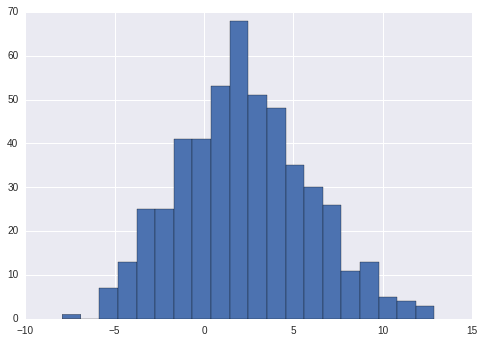

In [8]:
pylab.hist(x_2_35, bins=20)

([array([   0.,    5.,   25.,   46.,  115.,  144.,   84.,   57.,   20.,    4.]),
  array([   1.,    8.,   22.,   67.,   99.,  127.,   99.,   49.,   24.,    4.])],
 array([ 3.21279077,  3.53921466,  3.86563855,  4.19206244,  4.51848633,
         4.84491022,  5.17133411,  5.497758  ,  5.82418189,  6.15060579,
         6.47702968]),
 <a list of 2 Lists of Patches objects>)

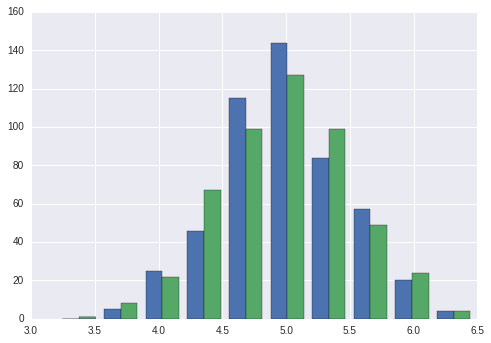

In [9]:
pylab.hist(A_5_05)

In [10]:
Tx_2_35 = K.variable(x_2_35, name='x_2_35')

In [11]:
Tmx = K.mean(Tx_2_35)

In [12]:
type(Tmx)

tensorflow.python.framework.ops.Tensor

In [13]:
K.eval(Tmx)

2.2613833

In [14]:
np.mean(x_2_35)

2.2613832127357498

In [15]:
Tstdx = K.std(Tx_2_35)

In [16]:
K.eval(Tstdx)

3.6342607

In [17]:
np.std(x_2_35)

3.6342605586126155

In [18]:
Tcentx = (Tx_2_35 - K.mean(Tx_2_35))/K.sqrt( K.var(Tx_2_35) )

In [19]:
K.eval(Tcentx)

array([ -3.02734375e-01,  -8.07632387e-01,   4.58304912e-01,
         1.93480439e-02,  -5.75610220e-01,  -2.29774430e-01,
        -3.32824707e-01,  -1.98422003e+00,   1.89955249e-01,
         2.11504459e+00,  -3.09879392e-01,  -1.20905805e+00,
         2.05445841e-01,  -5.40860295e-01,   7.90485382e-01,
         2.40060019e+00,  -4.71190661e-01,   3.94939125e-01,
        -1.20012236e+00,   1.51821524e-01,  -7.41189718e-01,
        -9.53833833e-02,   2.23114446e-01,  -8.76912296e-01,
        -1.71474266e+00,  -3.93860340e-02,   8.25882196e-01,
        -1.87339175e+00,   9.15210187e-01,   9.62944508e-01,
         1.27695036e+00,   2.33820796e-01,  -7.71044672e-01,
         6.87585473e-01,   1.13788378e+00,   7.32726753e-01,
        -1.66563320e+00,   1.98425746e+00,   1.89031208e+00,
        -2.05111623e-01,   9.68083858e-01,  -8.70707557e-02,
        -1.45955253e+00,   1.03944682e-01,  -4.52997744e-01,
         4.58035879e-02,   5.53460956e-01,  -6.29887223e-01,
        -2.41010725e-01,

In [20]:
K.eval(K.mean(Tcentx))

3.8649887e-08

In [22]:
K.eval(K.var(Tcentx))

1.0

In [23]:
Treturn = sample_normalize(Tx_2_35)

In [24]:
Treturn

<tf.Tensor 'truediv_1:0' shape=(500,) dtype=float32>

In [25]:
r = K.eval(Treturn) 
r

array([ -3.02733362e-01,  -8.07629883e-01,   4.58303541e-01,
         1.93480495e-02,  -5.75608373e-01,  -2.29773656e-01,
        -3.32823634e-01,  -1.98421371e+00,   1.89954743e-01,
         2.11503792e+00,  -3.09878379e-01,  -1.20905435e+00,
         2.05445275e-01,  -5.40858507e-01,   7.90482998e-01,
         2.40059280e+00,  -4.71189141e-01,   3.94937962e-01,
        -1.20011854e+00,   1.51821122e-01,  -7.41187334e-01,
        -9.53830257e-02,   2.23113820e-01,  -8.76909494e-01,
        -1.71473730e+00,  -3.93858477e-02,   8.25879693e-01,
        -1.87338603e+00,   9.15207386e-01,   9.62941587e-01,
         1.27694643e+00,   2.33820140e-01,  -7.71042228e-01,
         6.87583387e-01,   1.13788021e+00,   7.32724547e-01,
        -1.66562808e+00,   1.98425138e+00,   1.89030623e+00,
        -2.05110922e-01,   9.68080938e-01,  -8.70704204e-02,
        -1.45954800e+00,   1.03944421e-01,  -4.52996284e-01,
         4.58035097e-02,   5.53459287e-01,  -6.29885256e-01,
        -2.41009921e-01,

keras mean:  4.48227e-08 keras std: 0.999997


(array([  1.,   0.,   7.,  13.,  25.,  25.,  41.,  41.,  53.,  68.,  51.,
         48.,  35.,  30.,  26.,  11.,  13.,   5.,   4.,   3.]),
 array([-2.80749893, -2.5207257 , -2.23395247, -1.94717925, -1.66040602,
        -1.37363279, -1.08685956, -0.80008633, -0.5133131 , -0.22653987,
         0.06023335,  0.34700658,  0.63377981,  0.92055304,  1.20732627,
         1.4940995 ,  1.78087273,  2.06764596,  2.35441918,  2.64119241,
         2.92796564]),
 <a list of 20 Patch objects>)

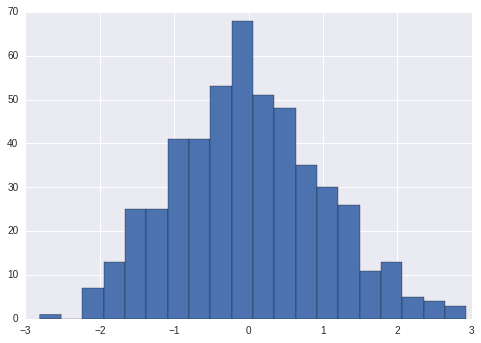

In [26]:
print('keras mean: ', np.mean(r), 'keras std:' , np.std(r))
pylab.hist(r, bins=20)

Here is what the code for a single step of LSTM looks like in Keras 
(recurrent.py, the LSTM class function)

```python 
    def step(self, x, states):
        h_tm1 = states[0]
        c_tm1 = states[1]
        B_U = states[2]
        B_W = states[3]

        if self.consume_less == 'gpu':
            z = K.dot(x * B_W[0], self.W) + K.dot(h_tm1 * B_U[0], self.U) + self.b

            z0 = z[:, :self.output_dim]
            z1 = z[:, self.output_dim: 2 * self.output_dim]
            z2 = z[:, 2 * self.output_dim: 3 * self.output_dim]
            z3 = z[:, 3 * self.output_dim:]

            i = self.inner_activation(z0)
            f = self.inner_activation(z1)
            c = f * c_tm1 + i * self.activation(z2)
            o = self.inner_activation(z3)
        else:
            if self.consume_less == 'cpu':
                x_i = x[:, :self.output_dim]
                x_f = x[:, self.output_dim: 2 * self.output_dim]
                x_c = x[:, 2 * self.output_dim: 3 * self.output_dim]
                x_o = x[:, 3 * self.output_dim:]
            elif self.consume_less == 'mem':
                x_i = K.dot(x * B_W[0], self.W_i) + self.b_i
                x_f = K.dot(x * B_W[1], self.W_f) + self.b_f
                x_c = K.dot(x * B_W[2], self.W_c) + self.b_c
                x_o = K.dot(x * B_W[3], self.W_o) + self.b_o
            else:
                raise Exception('Unknown `consume_less` mode.')

            i = self.inner_activation(x_i + K.dot(h_tm1 * B_U[0], self.U_i))
            f = self.inner_activation(x_f + K.dot(h_tm1 * B_U[1], self.U_f))
            c = f * c_tm1 + i * self.activation(x_c + K.dot(h_tm1 * B_U[2], self.U_c))
            o = self.inner_activation(x_o + K.dot(h_tm1 * B_U[3], self.U_o))

        h = o * self.activation(c)
        return h, [h, c]
```